## Sinewave Function

### Importing basic libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import MCMC_DZ.MCMC.Visualization_tools as Vts
import MCMC_DZ.MCMC.Statistic_tools as Sts
import os 
from MCMC_DZ.MCMC.MetropolisHastingMCMC.MHMC import MHMC
import MCMC_DZ.MCMC.MetropolisHastingMCMC.ProposalDistributions as PDs
from MCMC_DZ.BayesianInference.Likelihood_functions import Sinewave

### The pdf function

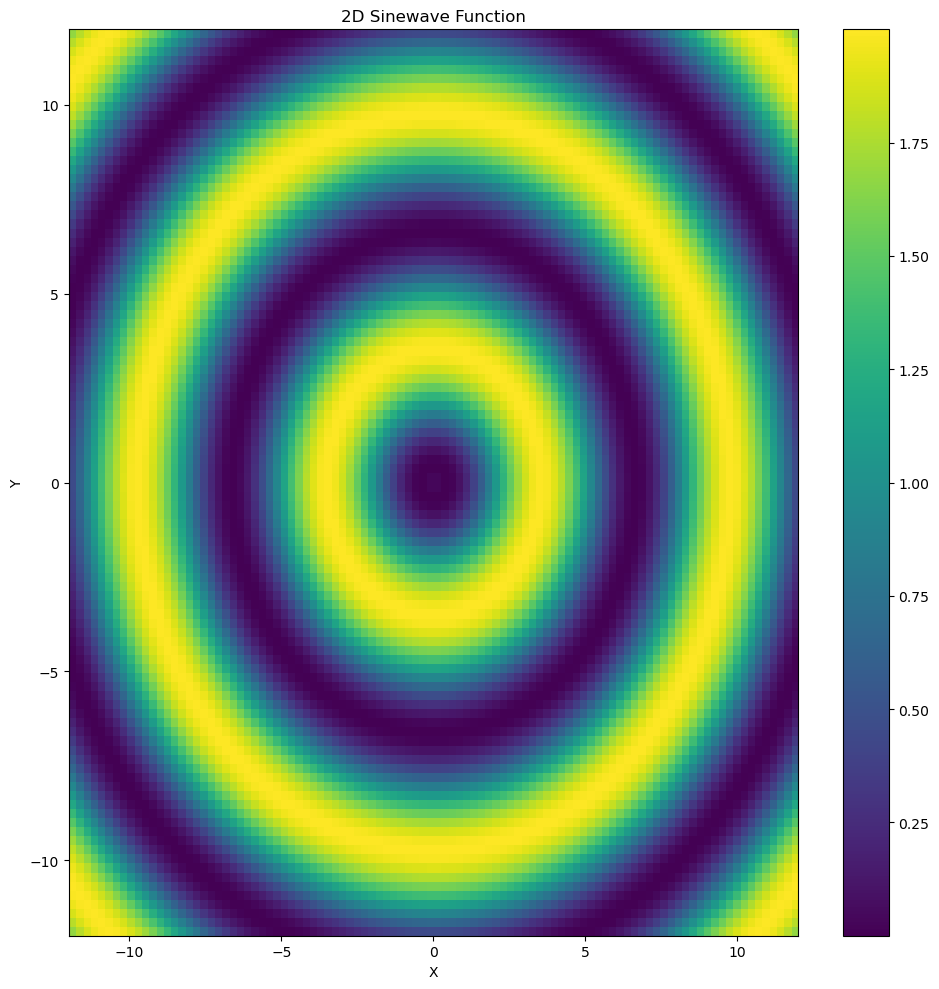

In [2]:
Data_range = np.array([[-12, 12], [-12, 12]])
SF = Sinewave.Sinewave_function([1, 2], Data_range)
Vts.Target_Distribution_Visualization(X_range=Data_range[0], Y_range=Data_range[1], Tar_Dis=SF.f, Func_name="2D Sinewave Function", alpha=1)

### Generating the Fake Data

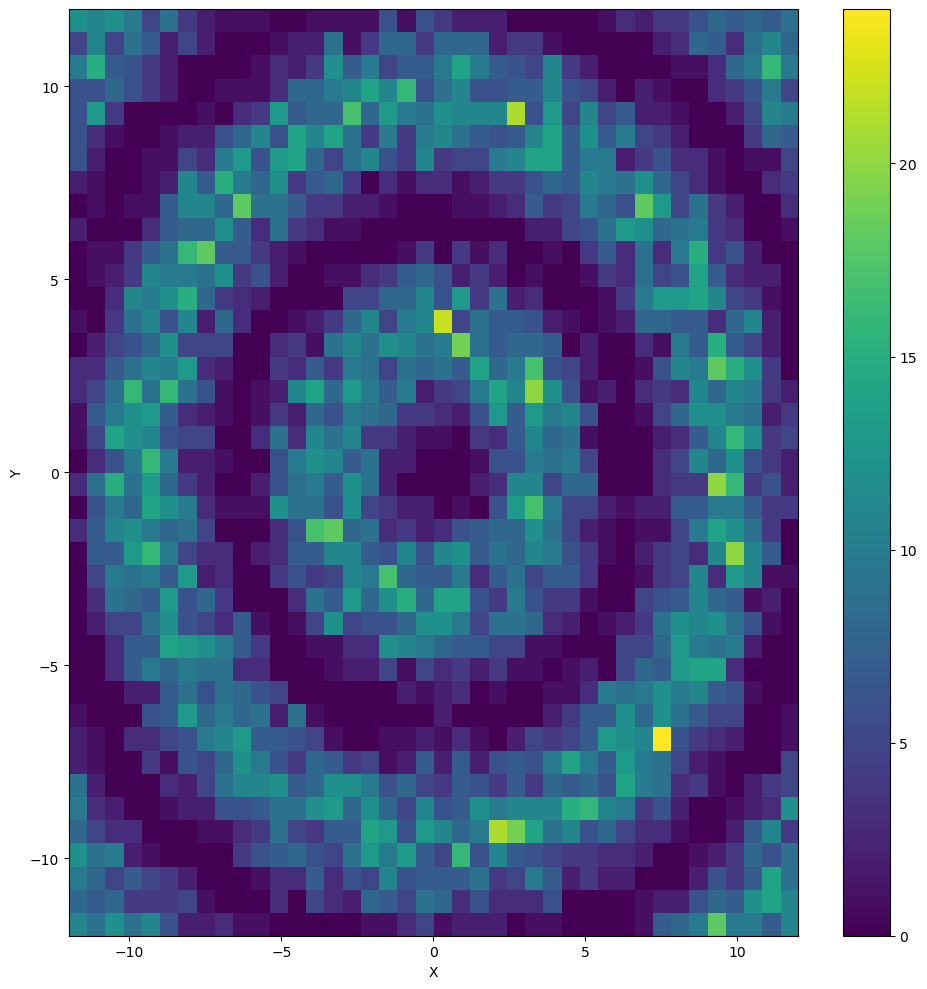

In [3]:
Data_range = np.array(Data_range)

SFFD_P = Sts.FakeDataGen2D_Poisson(SF.f, Data_range, 40, scaler=15)

Vts.PlotHeatmap(SFFD_P.x ,SFFD_P.y, SFFD_P.BinsValue.reshape(SFFD_P.x.shape), xlabel="X", ylabel="Y", zlabel="F(X,Y)")

### Generating the Likelihood Function

In [4]:
def Prior(params):
    if (0<params[0] and params[0]<=2 and -np.pi<params[1] and params[1]<np.pi):
        return 1
    else:
        return 0
SF_l = Sts.LikeliFuncGen_ContinuousPoisson(SFFD_P, SF, Prior)

In [5]:
def PlotHeatmap(x, y, z, xlabel, ylabel, zlabel, Plot_Max=False, Plot3D=False):
    if Plot3D:
        # Creat the surface plot
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(x, y, z, cmap='viridis', alpha=1)
        fig.colorbar(ax.plot_surface(x, y, z, cmap='viridis'))
        max_idx = np.argmax(z)
        if Plot_Max:
            row = int(max_idx/z.shape[1])
            col = int(max_idx%z.shape[1])
            x_max = x[row, col]
            y_max = y[row, col]
            z_max = z[row, col]
            ax.scatter(x_max, y_max, z_max, c='red', marker='o', linewidths=2, label=f"The Maxumum likelihood point ({xlabel}, {ylabel}) = ({x_max:.3f}, {y_max:.3f})")
            ax.legend()

        # Set the plot title and axis labels
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.set_zlabel(zlabel)
    else:
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(111)
        ax.imshow(z, cmap='viridis', origin="lower", extent=[x.min(), x.max(), y.min(), y.max()], aspect='auto', vmin=np.min(z)+(np.max(z)-np.min(z))*0.95)
        fig.colorbar(ax.imshow(z, cmap='viridis', origin="lower", extent=[x.min(), x.max(), y.min(), y.max()], aspect='auto', vmin=np.min(z)+(np.max(z)-np.min(z))*0.95))
        max_idx = np.argmax(z)
        if Plot_Max:
            x_max = x[max_idx//z.shape[1], max_idx%z.shape[1]]
            y_max = y[max_idx//z.shape[1], max_idx%z.shape[1]]
            ax.scatter(x_max, y_max, c='red', marker='o', linewidths=2, label=f"The Maxumum likelihood point ({xlabel}, {ylabel}) = ({x_max:.3f}, {y_max:.3f})")
            ax.legend()

        # Set the plot title and axis labels
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)

    plt.tight_layout()
    plt.show()

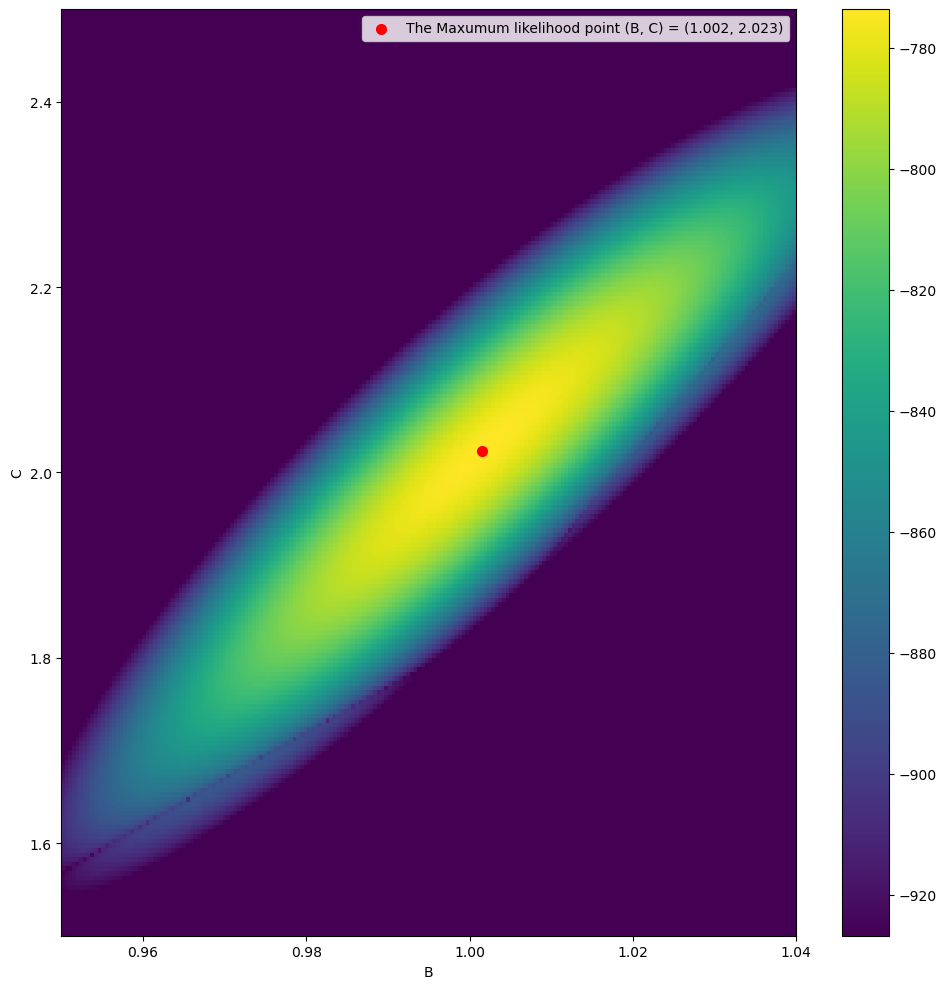

In [6]:
Bs = np.linspace(0.95, 1.04, 200)
Cs = np.linspace(1.5, 2.5, 200)
Bs, Cs = np.meshgrid(Bs, Cs)

Ls = []
for params in zip(Bs.flatten(), Cs.flatten()):
    Ls.append(SF_l.Log_Likelihood(params))

Ls = np.asarray(Ls).reshape(Bs.shape)
PlotHeatmap(Bs, Cs, Ls, xlabel="B", ylabel="C", zlabel="l(B, C)", Plot_Max=True)

### Initializing the list to collect the outputs of the MCMC algorithm

In [7]:
Res = []

In [8]:
# Loading the pre outputs
data_folder = "Datas/Data_40bins_10scale_Sinewave/"
for name in os.listdir(data_folder):
    data_dir = os.path.join(data_folder, name)
    Res.append(Sts.Loading_Data(data_dir))

### Applying MCMC algorithm on the likelihood funciton

In [8]:
steps = 1000000

In [25]:
sd = [0.0025, 0.005]
Prop_G = PDs.GaussianProposalDistribution(sd=sd, Dim=2)
MHMC_SF = MHMC(rho=SF_l.Log_Likelihood, log_likelihood=True)
Res_G_SF = MHMC_SF.generate(
    theta0=[1 for _ in range(2)],
    ProposalFunction=Prop_G,
    steps=steps,
    OutputRunTime=100,
    MaxTime=4000
)

Res.append(Res_G_SF)

### Saving Data

In [26]:
for k in range(len(Res)):
    sd = Res[k]["PD_sd"]
    Saving_dir = f"Datas/Data_40bins_10scale_Sinewave/Res_G_SF(sd={sd}).npz"
    Sts.Saving_Data(Res[k], FileName=Saving_dir)

### Visualizing the output of the MCMC algorithm

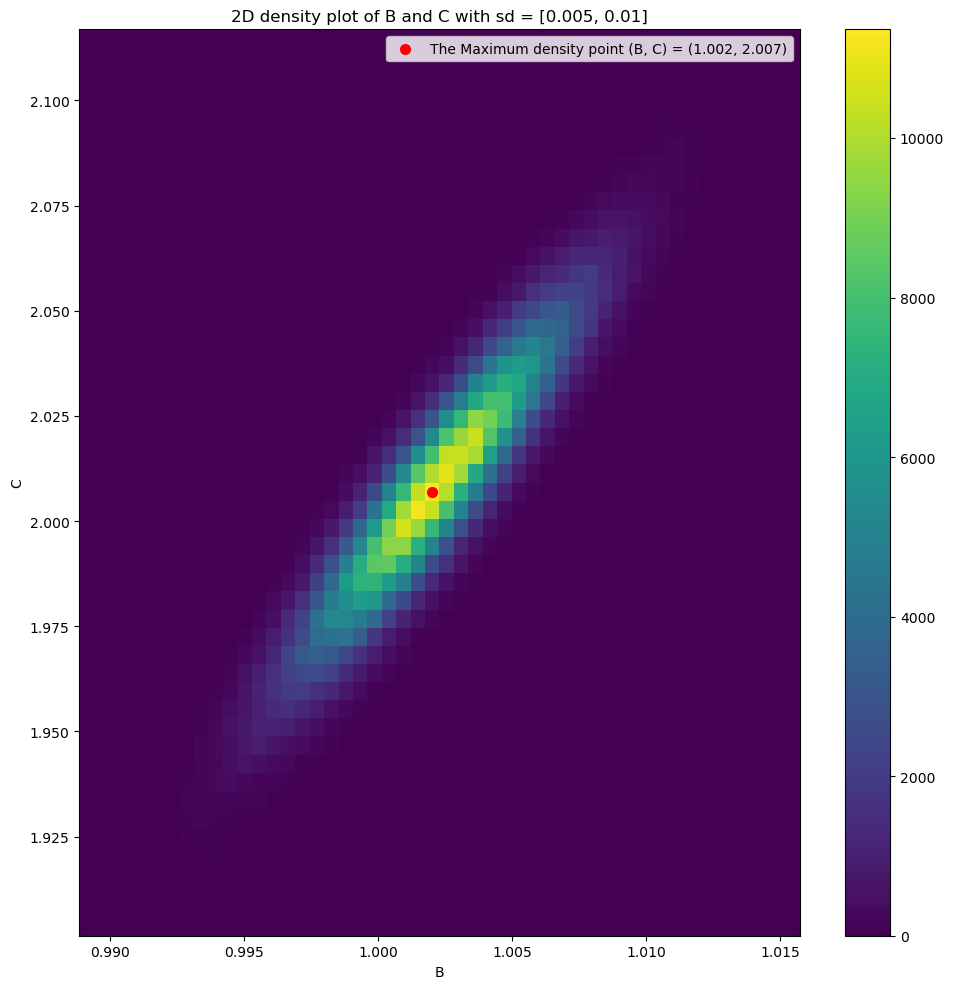

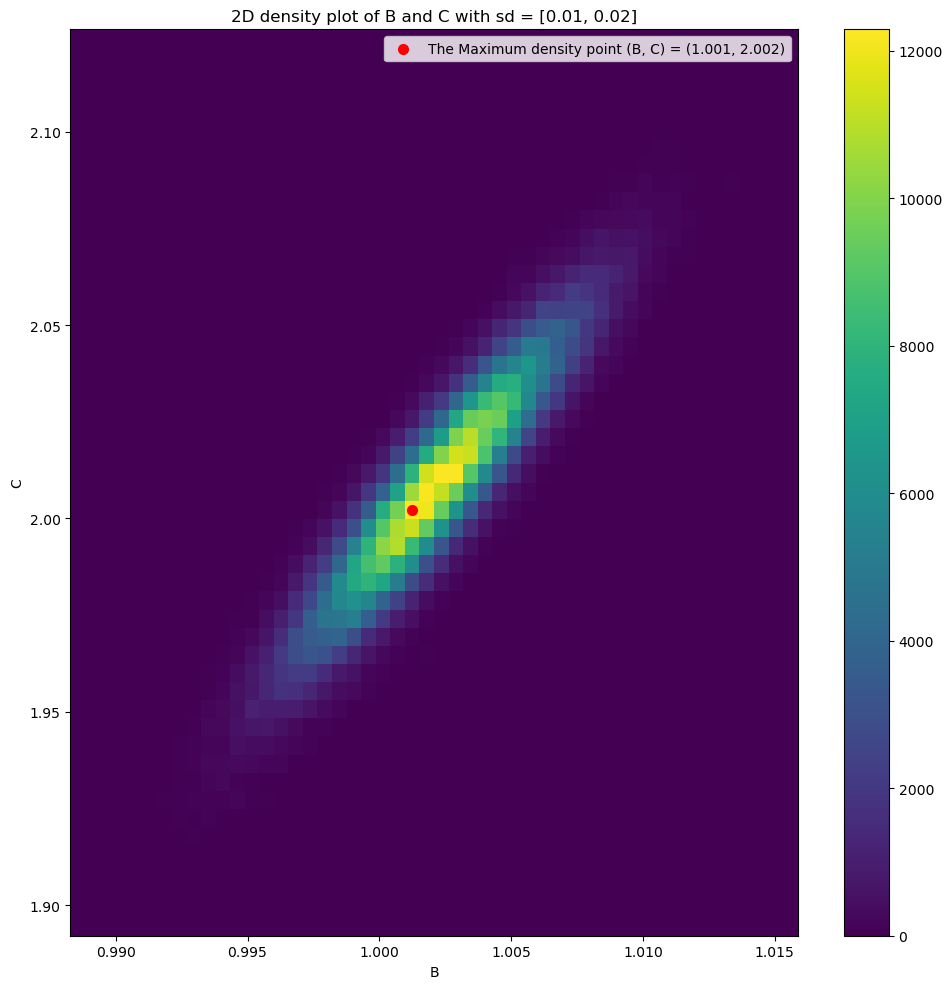

In [18]:
for Res_G_SF in Res:
    sd = Res_G_SF["PD_sd"]
    Vts.density_plot(
        Res_G_SF["Thetas"], 
        bins=50,
        burn_in=10000,
        credible_region=0,
        x_name="B",
        y_name="C",
        label = f" with sd = {sd}",
        alpha=1
    )

c:\Users\91464\Nutstore\1\Nutstore\MLBD\PHYS70023\Coding\MCMC_DZ\MCMC\Visualization_tools.py:249: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


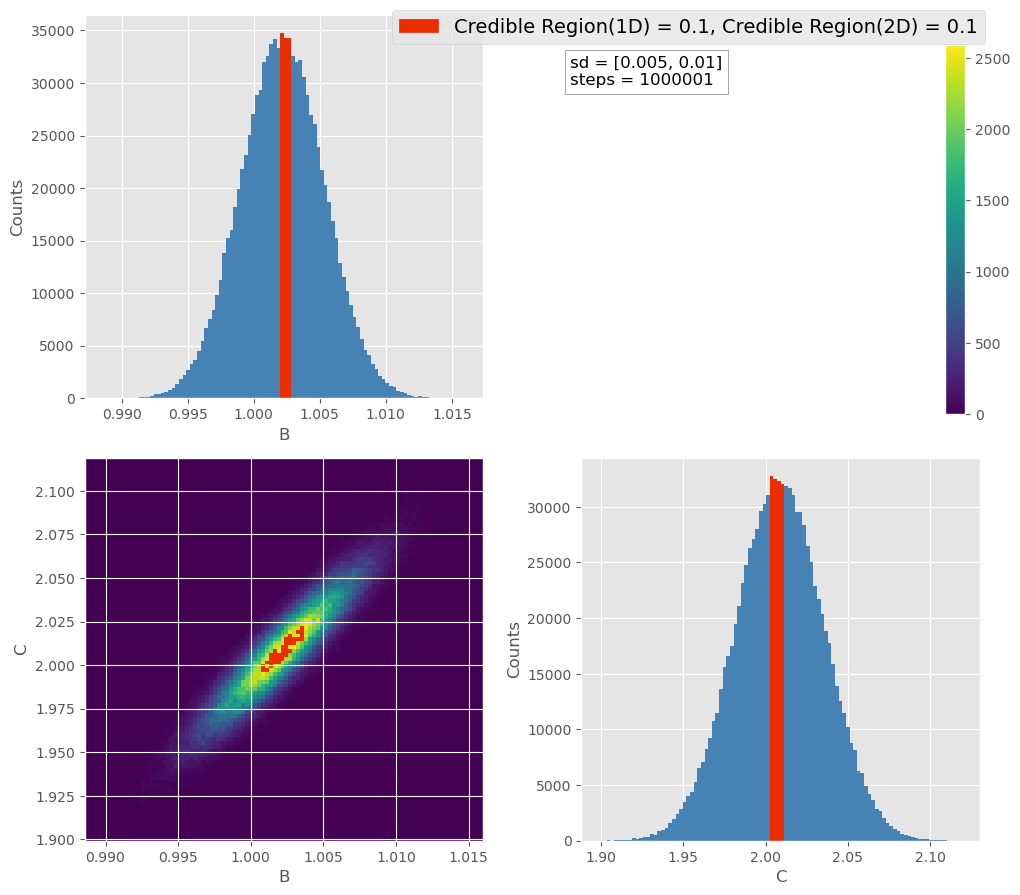

c:\Users\91464\Nutstore\1\Nutstore\MLBD\PHYS70023\Coding\MCMC_DZ\MCMC\Visualization_tools.py:249: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


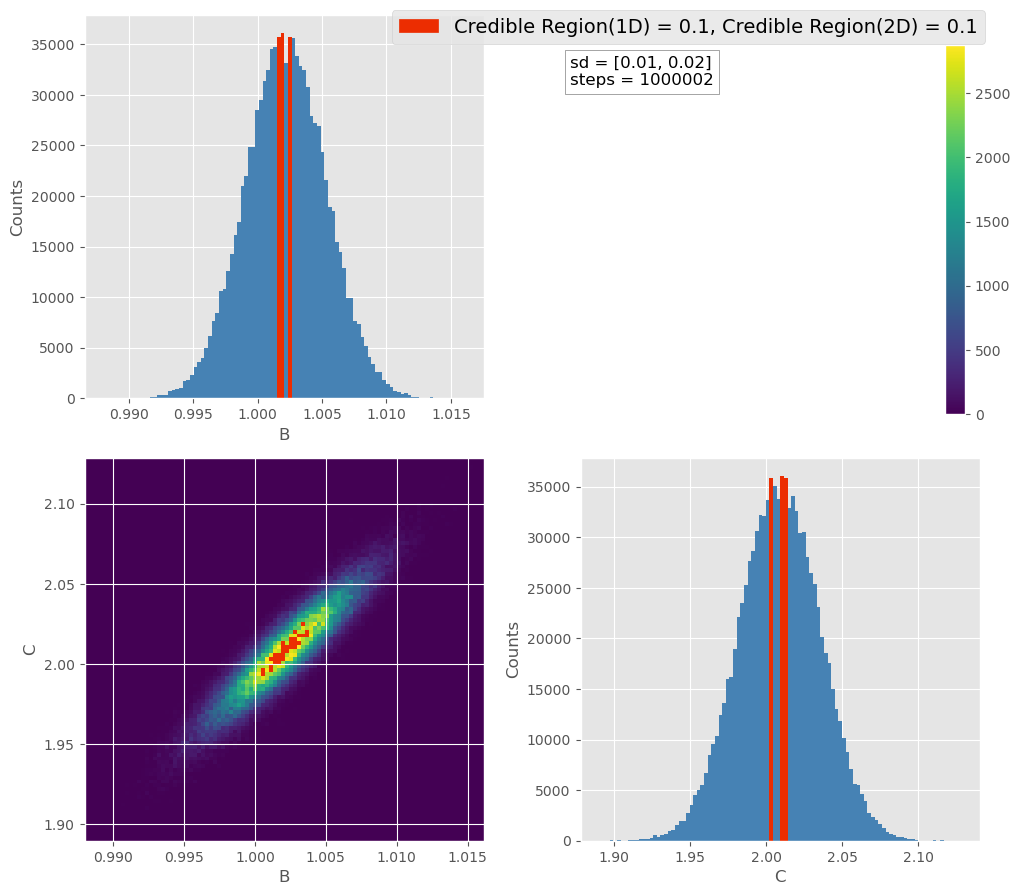

In [19]:
for Res_G_SF in Res:
    sd = Res_G_SF["PD_sd"]
    steps = Res_G_SF["Thetas"].shape[0]
    _ = Vts.density_plots(
        Res_G_SF["Thetas"],
        plot_axis=[0, 1],
        bins=100,
        burn_in=5000,
        axis_name=["B", "C"],
        cr_1D=0.1,
        cr_2D=0.1,
        information=f"sd = {sd}\nsteps = {steps}"
    )


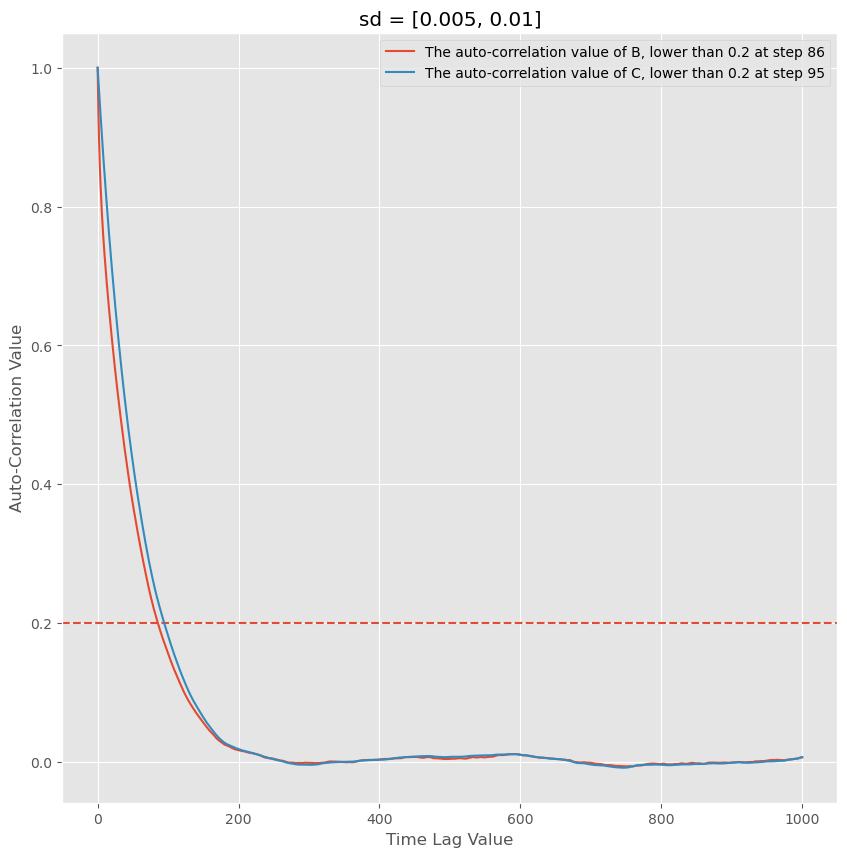

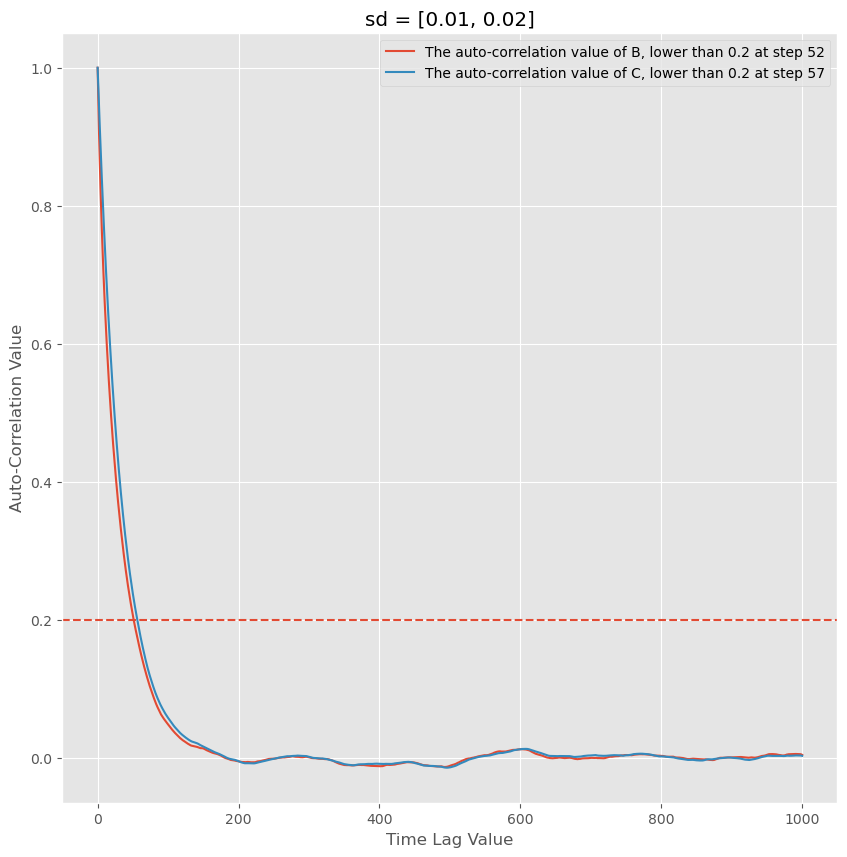

In [20]:
for Res_G_SF in Res:
    sd = Res_G_SF["PD_sd"]
    Vts.auto_corr_plot(Thetas=Res_G_SF["Thetas"], plot_nth_theta=[0,1], theta_index=["B", "C"], max_time_lag=1000, data_range=[1000, steps], Threshold=0.2, set_title=f"sd = {sd}")

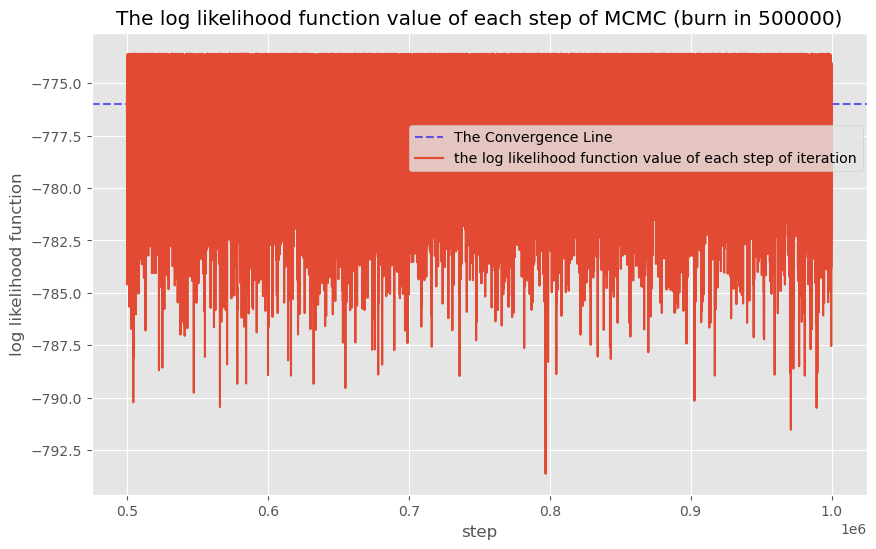

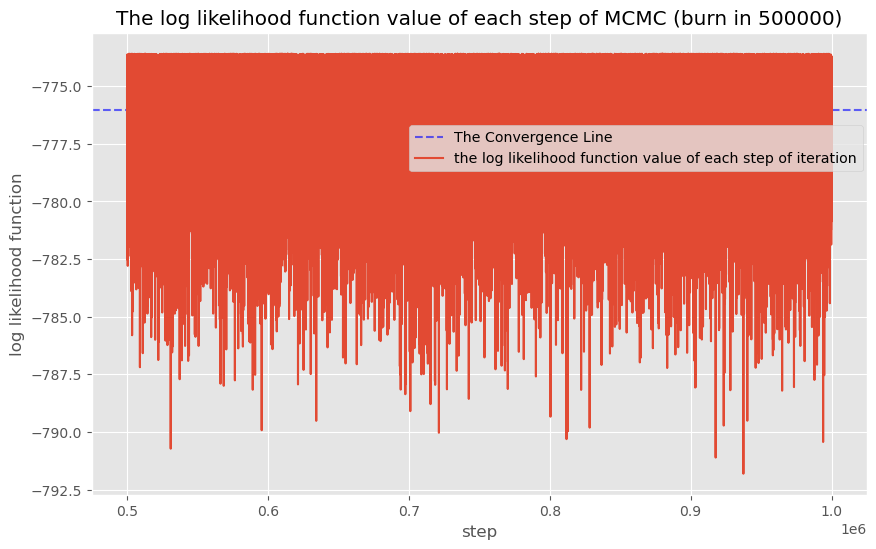

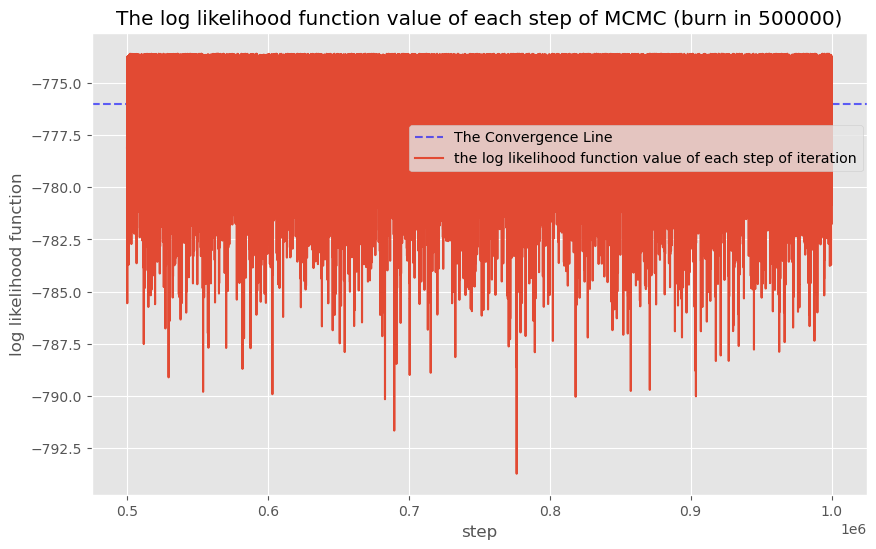

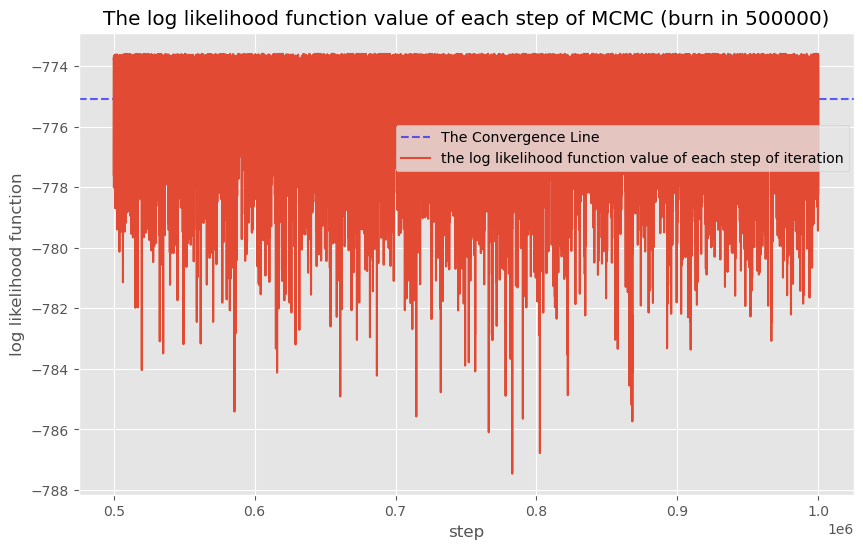

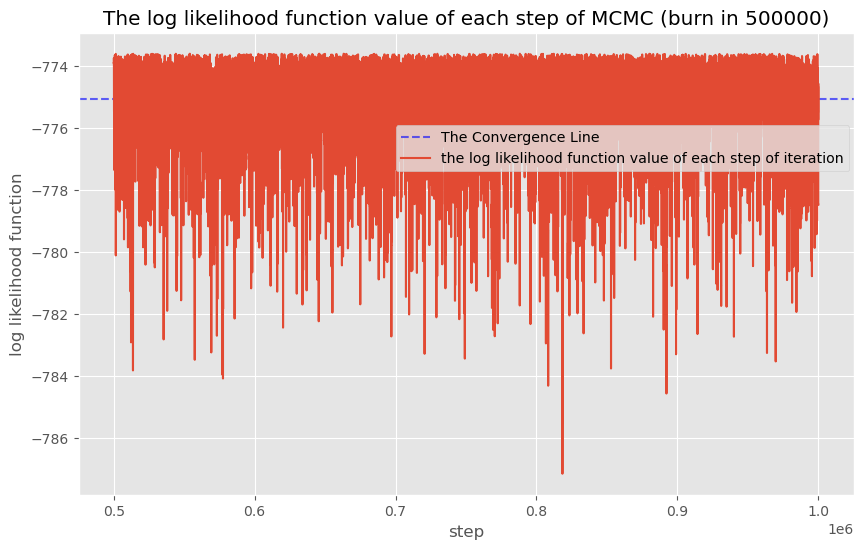

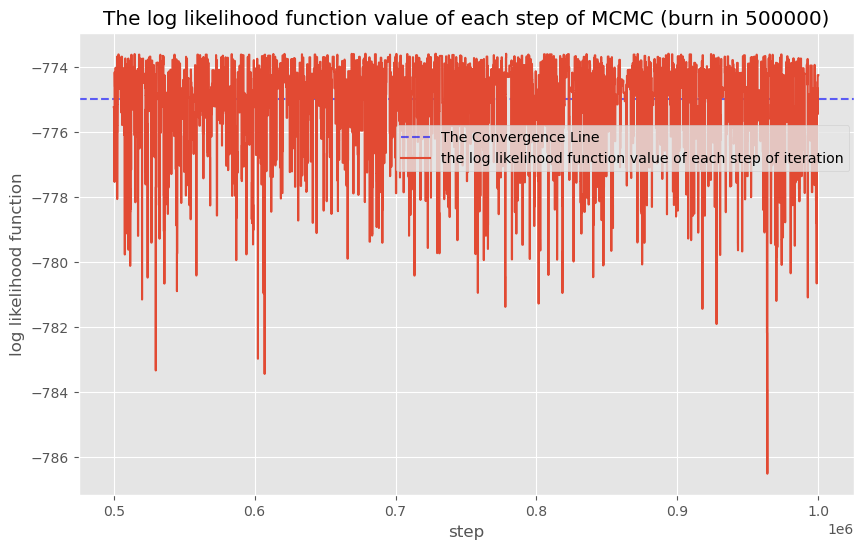

In [16]:
for Res_i in Res:
    sd = Res_i["PD_sd"]
    Vts.targetDis_step_plot(
        Thetas=Res_i["Thetas"], 
        rho=SF_l.Log_Likelihood, 
        target_type="log likelihood function", 
        burn_in=500000, 
        figsize=(10,6),
        Saving_address=f"./Implementation_Images/Sinewave2D/MHMCMC/likelihood_plot_zoom_in sd={sd}.png"
        # zoom_size=1000
    )

In [24]:
for Res_G_SF in Res:
    sd = Res_G_SF["PD_sd"]
    ac = Res_G_SF["Acceptance_Rate"]
    time = Res_G_SF["Run_Times"][-1]
    print(f"When sd = {sd}, acceptance rate = {ac}, time taken {time}")

When sd = [0.005, 0.01], acceptance rate = 0.274911, time taken 1985.4785296999999
When sd = [0.01, 0.02], acceptance rate = 0.13348386651613348, time taken 1875.6379989000015


In [ ]:
for Res_G_SF in Res:
    sd = Res_G_SF["PD_sd"]
    ac = Res_G_SF["Acceptance_Rate"]
    time = Res_G_SF["Run_Times"][-1]
    print(f"When sd = {sd}, acceptance rate = {ac}, time taken {time}")

When sd = [0.005, 0.01], acceptance rate = 0.274911, time taken 1985.4785296999999
When sd = [0.01, 0.02], acceptance rate = 0.13348386651613348, time taken 1875.6379989000015


In [ ]:
for Res_G_SF in Res:
    sd = Res_G_SF["PD_sd"]
    ac = Res_G_SF["Acceptance_Rate"]
    time = Res_G_SF["Run_Times"][-1]
    print(f"When sd = {sd}, acceptance rate = {ac}, time taken {time}")

When sd = [0.005, 0.01], acceptance rate = 0.274911, time taken 1985.4785296999999
When sd = [0.01, 0.02], acceptance rate = 0.13348386651613348, time taken 1875.6379989000015


### Testing Functions

In [15]:
Vts.UpdatingPlot(Data_range=[0, 200], Data=Res[0]["Thetas"])

### Hamiltonian MCMC

In [11]:
Res_H = []

In [12]:
# Loading the pre outputs
data_folder = "Datas/Data_40bins_10scale_Sinewave_H/"

for name in os.listdir(data_folder):
    data_dir = os.path.join(data_folder, name)
    Res_H.append(Sts.Loading_Data(data_dir))

In [27]:
steps = 100000

In [36]:
for L in [6, 8]:
    epsilon = 0.0025
    Prop_H = PDs.HamiltonianProposalFunction(rho=SF_l.Log_Likelihood, epsilon=epsilon, L=L, log_likelihood=True)
    MHMC_SF = MHMC(rho=Prop_H.U, log_likelihood=True)
    Res_H_SF = MHMC_SF.generate(
        theta0=[0.5 for _ in range(2)],
        ProposalFunction=Prop_H,
        steps=steps,
        OutputRunTime=100,
        MaxTime=600
    )
    Res_H.append(Res_H_SF)

In [36]:
# data_dir = "Datas/Res_H_SF_Prior.npz"
# Res_H_SF = (Sts.Loading_Data(data_dir))

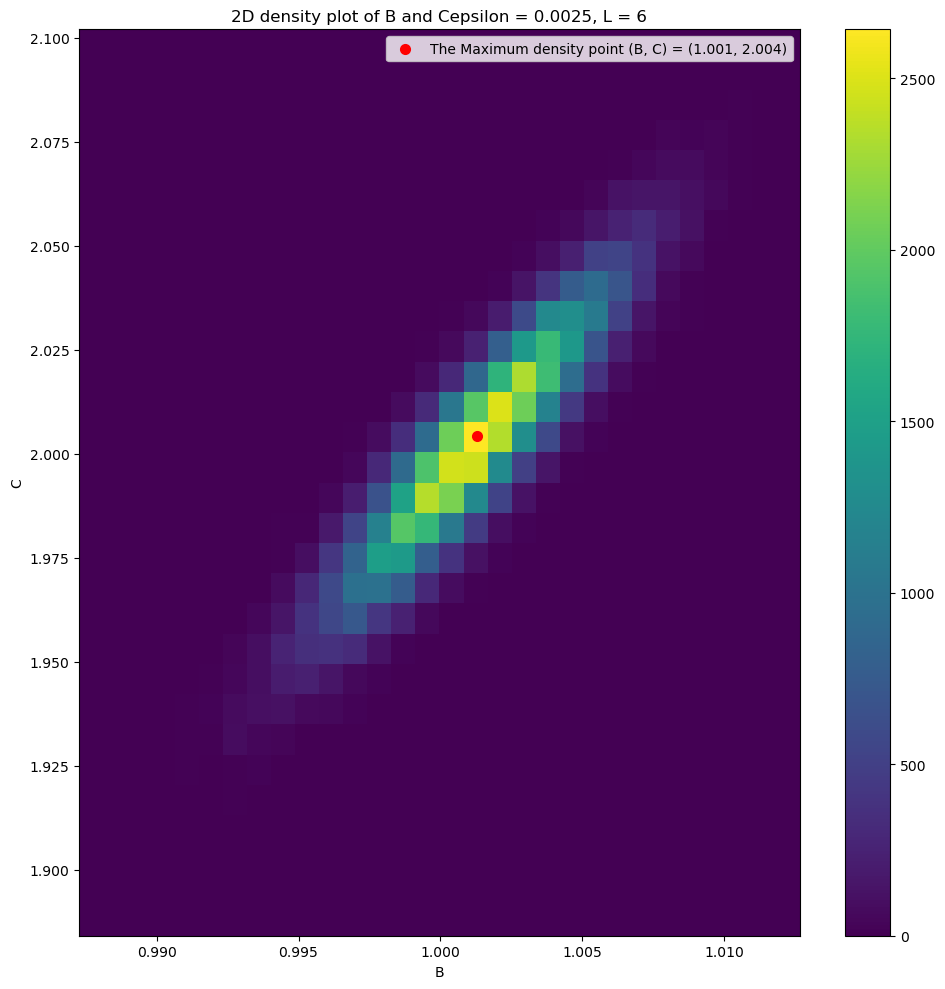

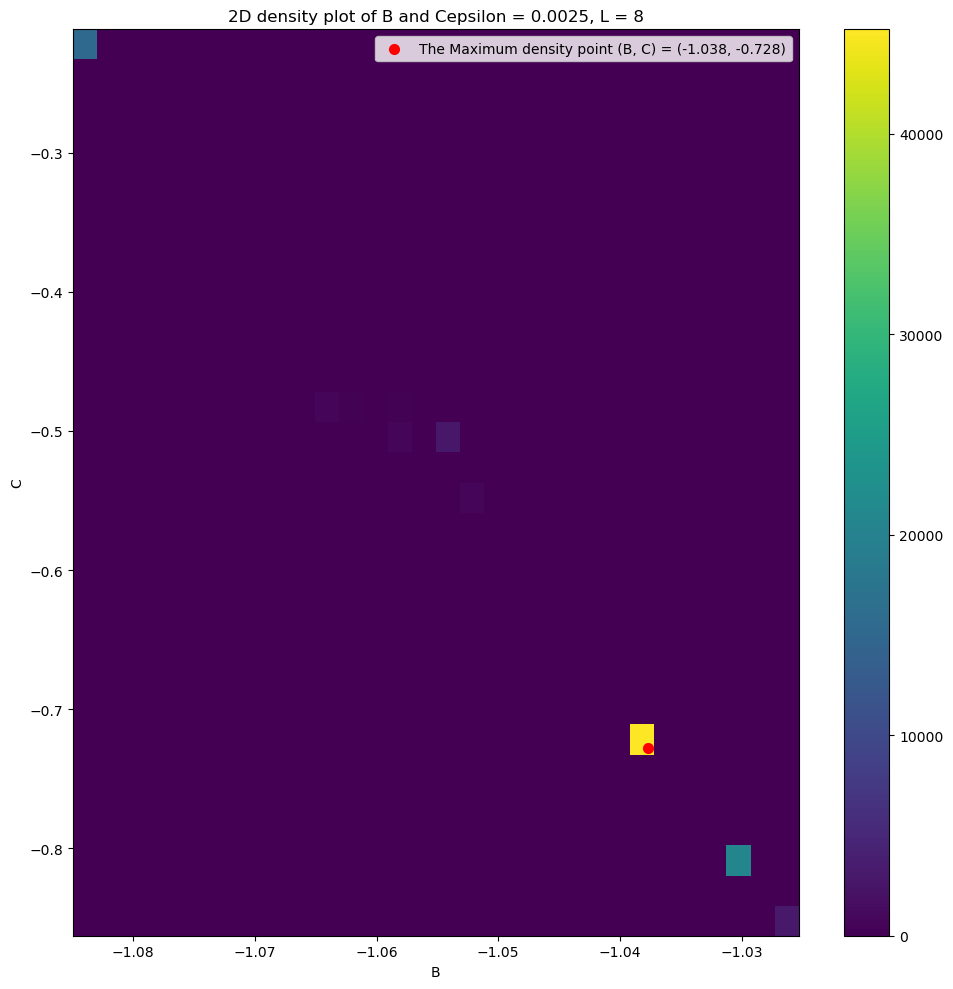

In [37]:
for Res_H_SF in Res_H:
    epsilon = Res_H_SF["PF_epsilon"]
    L = Res_H_SF["PF_L"]
    Vts.density_plot(
        Res_H_SF["Thetas"], 
        bins=30,
        burn_in=10000,
        credible_region=0,
        x_name="B",
        y_name="C",
        alpha=1,
        # zoom_in = [[0.96, 1.04], [1.6, 2.4]],
        label = f"epsilon = {epsilon}, L = {L}"
    )

c:\Users\91464\Nutstore\1\Nutstore\MLBD\PHYS70023\Coding\MCMC_DZ\MCMC\Visualization_tools.py:249: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


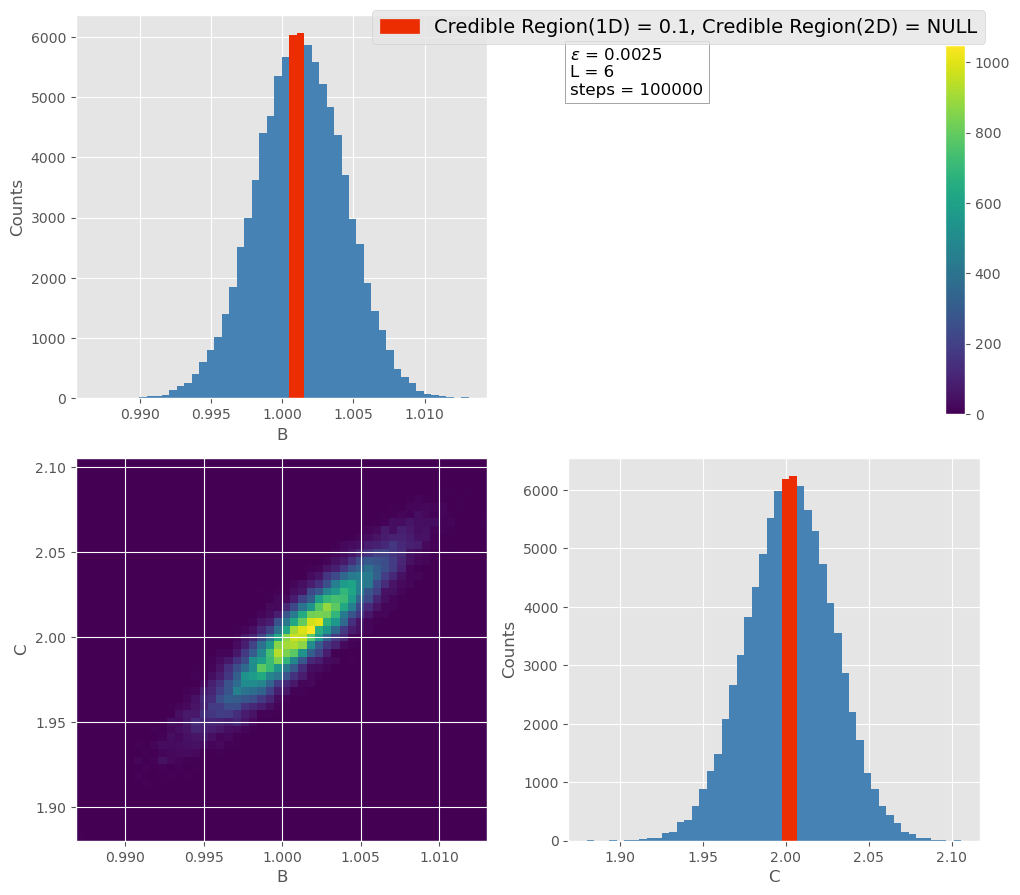

c:\Users\91464\Nutstore\1\Nutstore\MLBD\PHYS70023\Coding\MCMC_DZ\MCMC\Visualization_tools.py:249: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


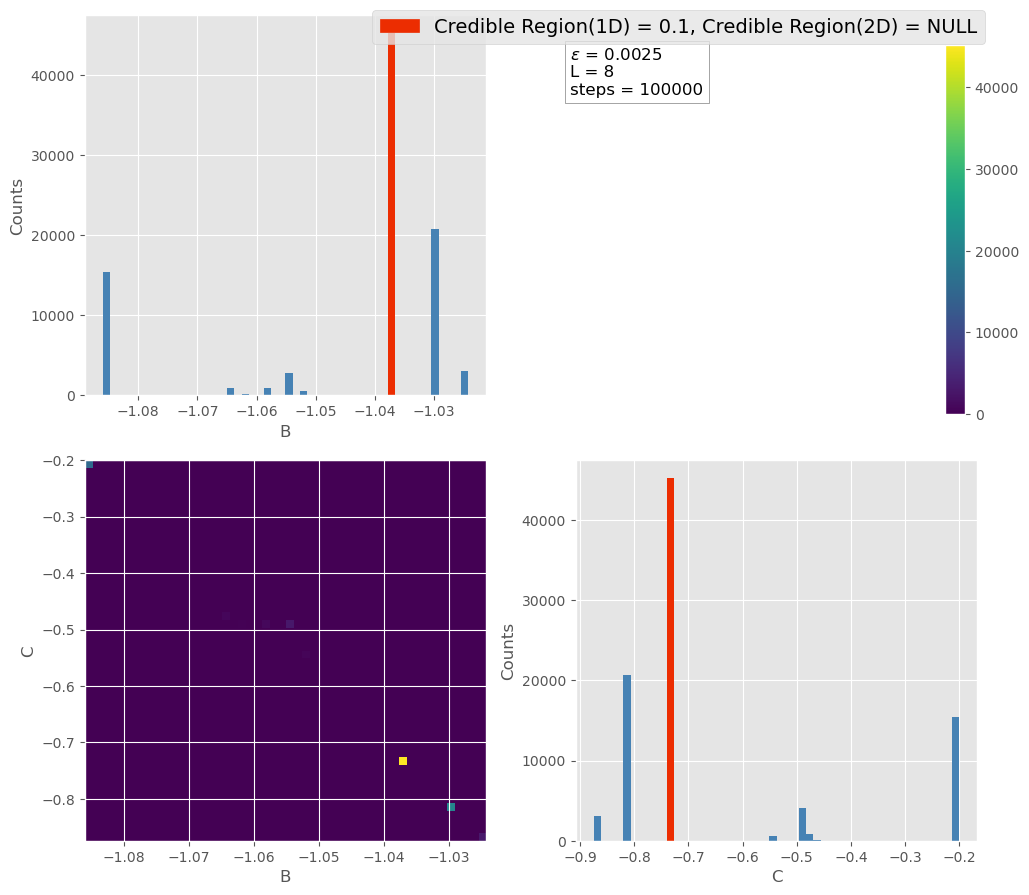

In [38]:
for Res_H_SF in Res_H:
    epsilon = Res_H_SF["PF_epsilon"]
    L = Res_H_SF["PF_L"]
    _ = Vts.density_plots(
        Res_H_SF["Thetas"],
        plot_axis=[0, 1],
        bins=50,
        burn_in=10000,
        axis_name=["B", "C"],
        cr_1D=0.1,
        cr_2D=0.0,
        information=f"$\epsilon$ = {epsilon}\nL = {L}\nsteps = {steps}"

    )

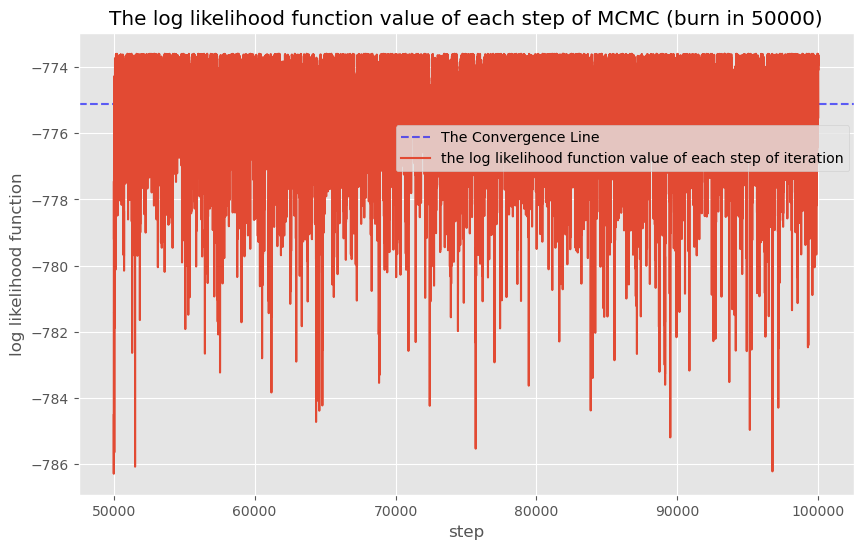

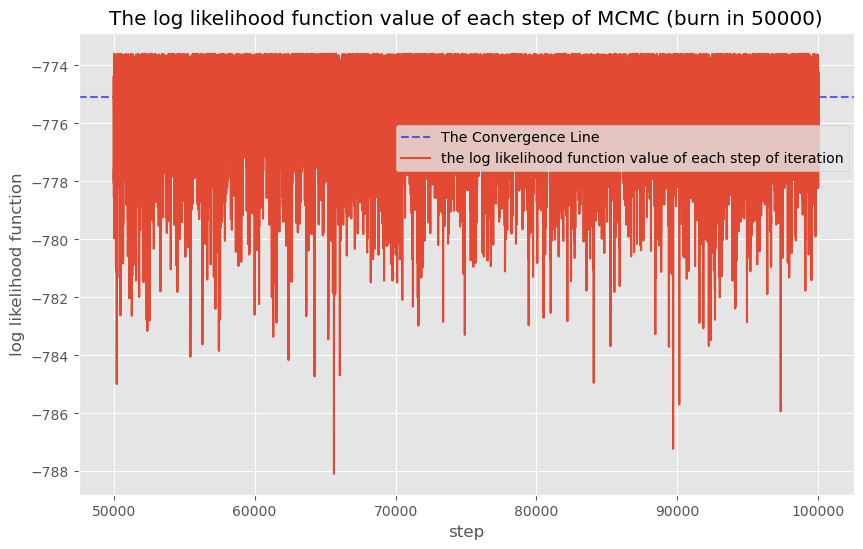

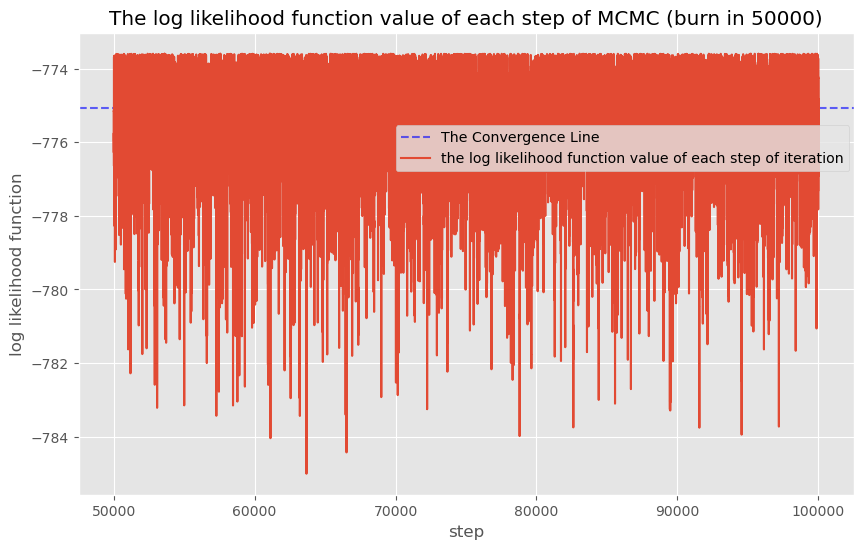

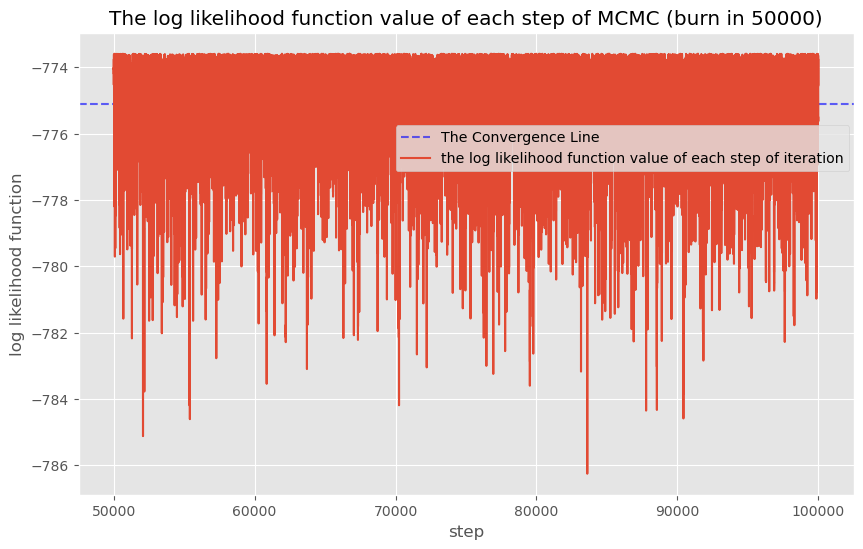

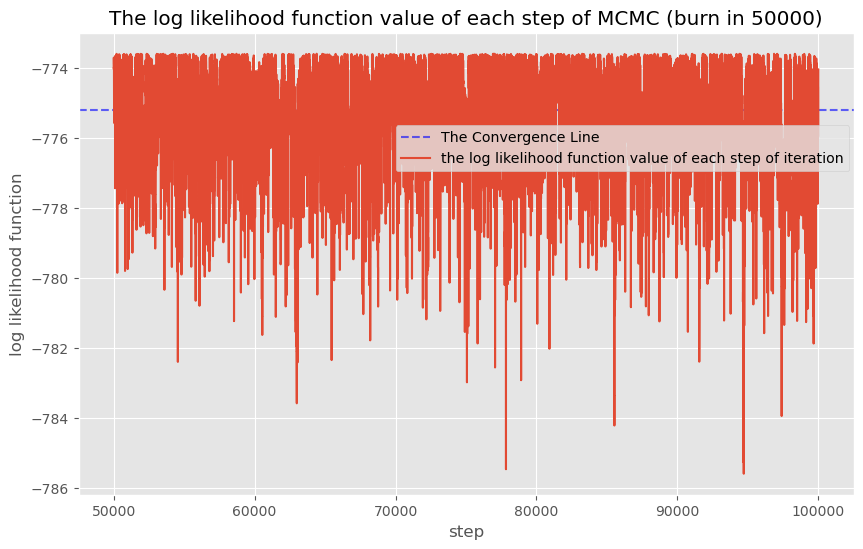

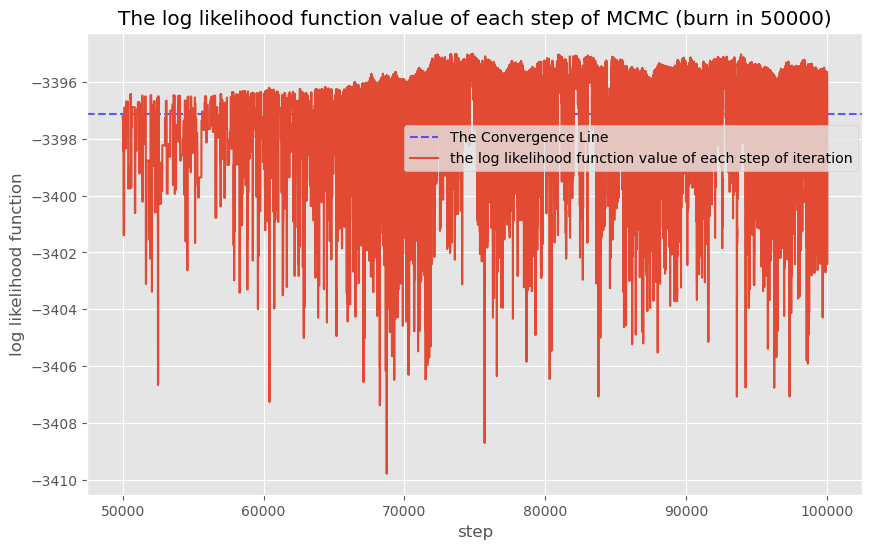

In [17]:
for Res_H_i in Res_H:
    epsilon = Res_H_i["PF_epsilon"]
    L = Res_H_i["PF_L"]
    Vts.targetDis_step_plot(
        Thetas=Res_H_i["Thetas"][:100000+1], 
        rho=SF_l.Log_Likelihood, 
        target_type="log likelihood function", 
        burn_in=50000, 
        figsize=(10,6),
        # zoom_size=1000,
        Saving_address=f"./Implementation_Images/Sinewave2D/HMCMC/likelihood_plot_zoom_in epsilon={epsilon}, L={L}.png"
    )

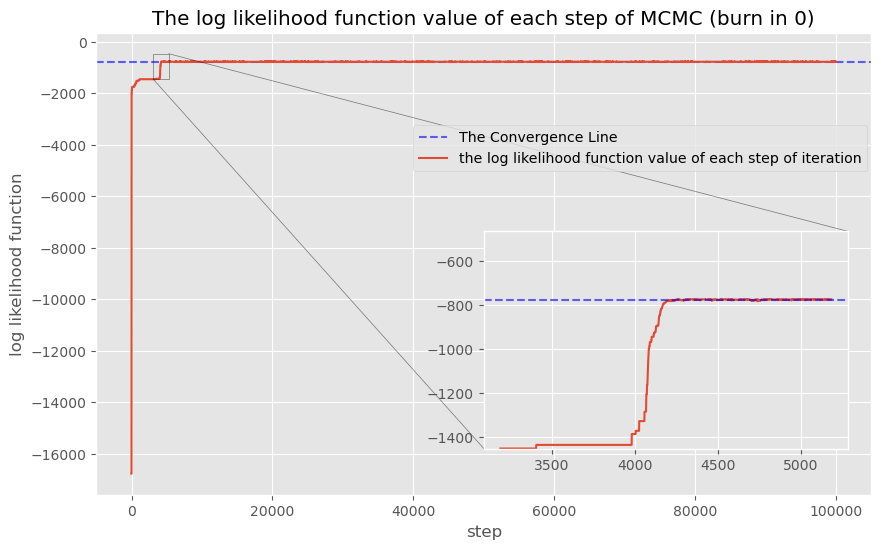

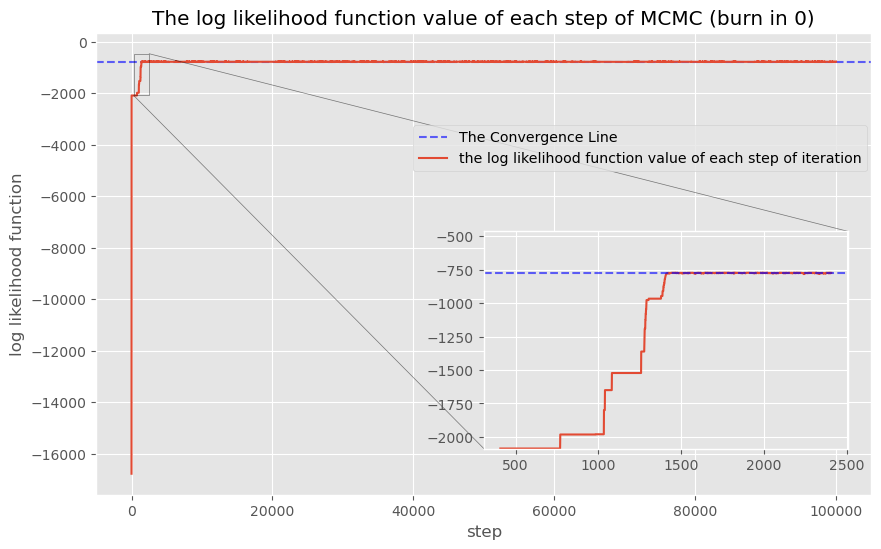

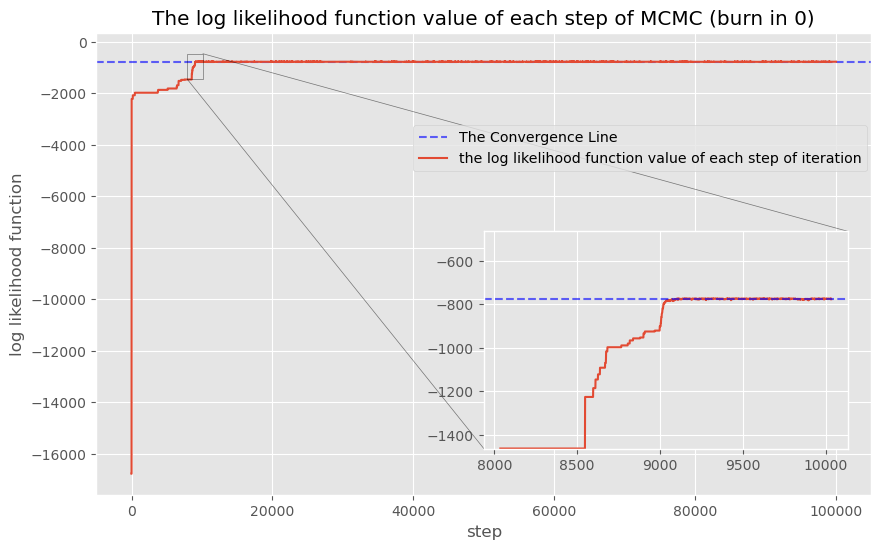

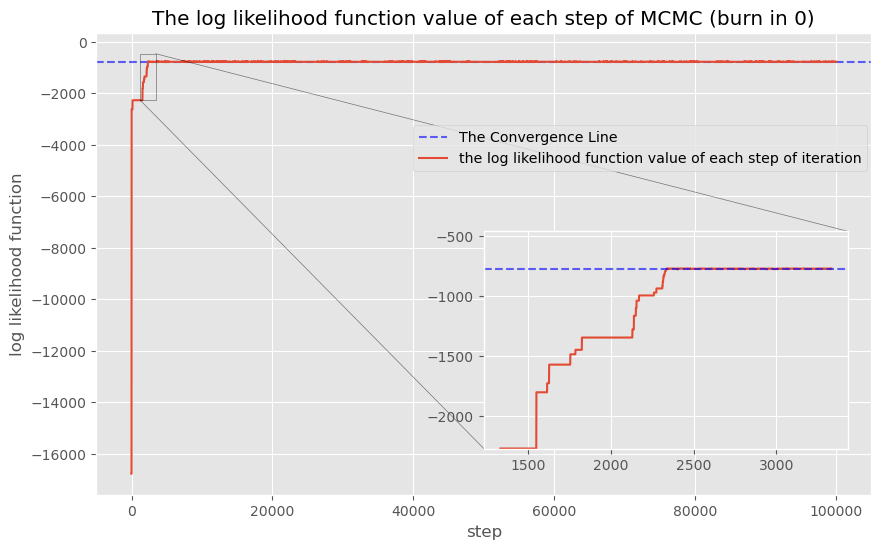

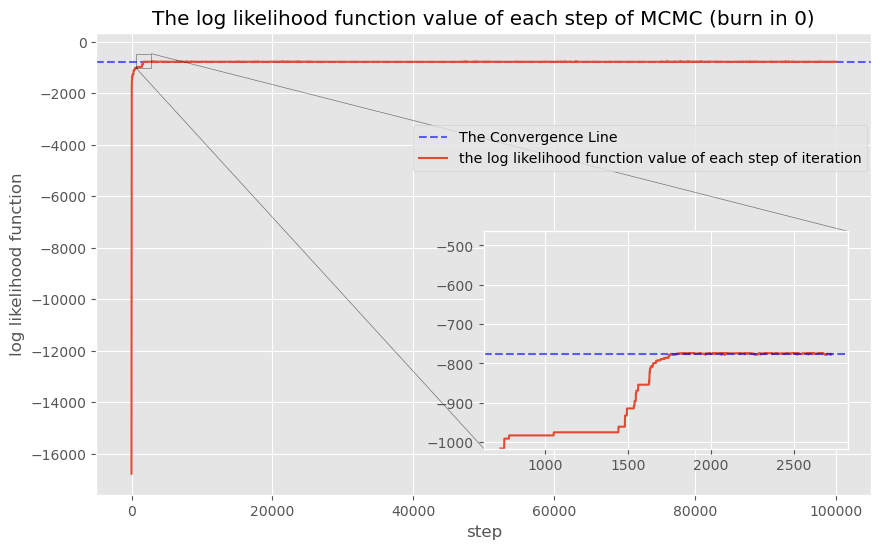

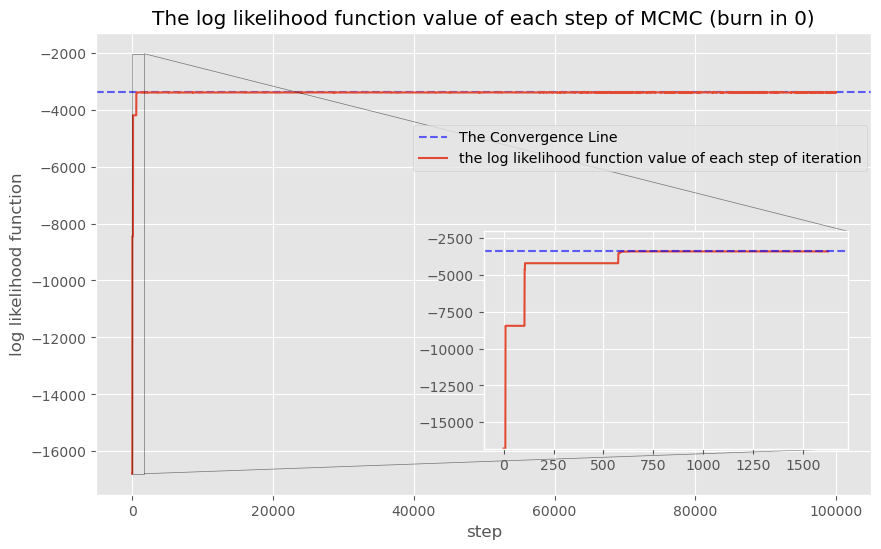

In [18]:
for Res_H_i in Res_H:
    epsilon = Res_H_i["PF_epsilon"]
    L = Res_H_i["PF_L"]
    Vts.targetDis_step_plot(
        Thetas=Res_H_i["Thetas"][:100000+1], 
        rho=SF_l.Log_Likelihood, 
        target_type="log likelihood function", 
        burn_in=0, 
        figsize=(10,6),
        zoom_size=1000,
        Saving_address=f"./Implementation_Images/Sinewave2D/HMCMC/likelihood_plot epsilon={epsilon}, L={L}.png"
    )

In [40]:
for Res_H_SF in Res_H:
    epsilon = Res_H_SF["PF_epsilon"]
    L = Res_H_SF["PF_L"]
    ac = Res_H_SF["Acceptance_Rate"]
    time = Res_H_SF["Run_Times"][-1]
    print(f"acceptance rate = {ac}, time taken {time}, epsilon = {epsilon}, L = {L}")

acceptance rate = 0.55103, time taken 377.22449290000077, epsilon = 0.0025, L = 6
acceptance rate = 0.00018, time taken 472.77292899999884, epsilon = 0.0025, L = 8


In [41]:
for k in range(len(Res_H)):
    epsilon = Res_H[k]["PF_epsilon"]
    L = Res_H[k]["PF_L"]
    Saving_dir = f"Datas/Data_40bins_10scale_Sinewave_H/Res_G_SF(epsilon={epsilon}, L={L}).npz"
    Sts.Saving_Data(Res_H[k], FileName=Saving_dir)

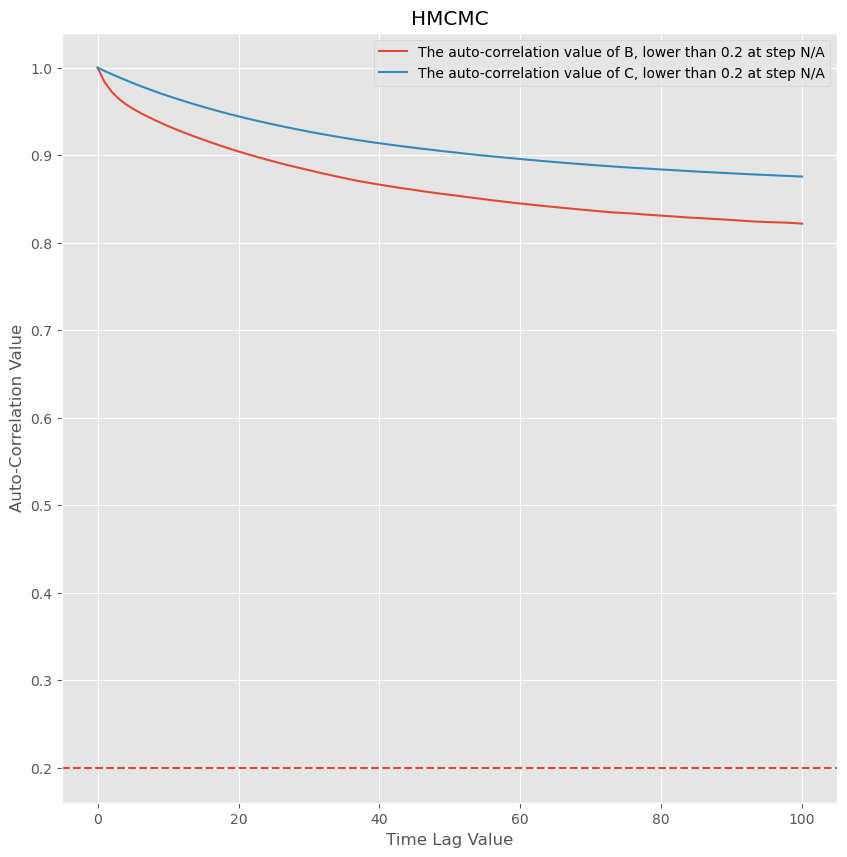

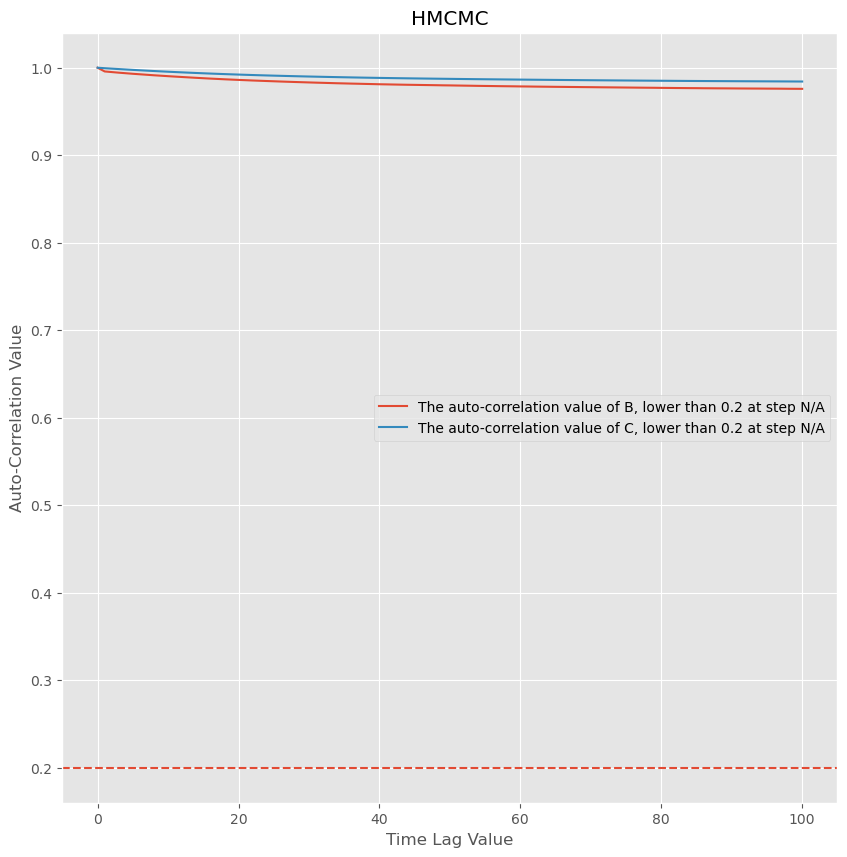

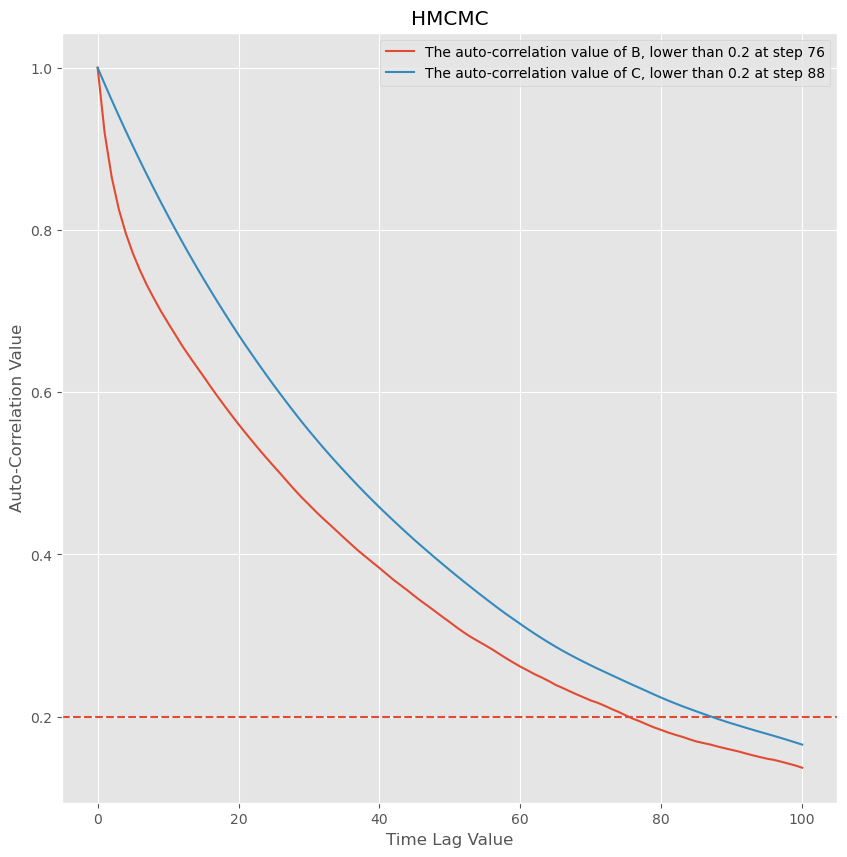

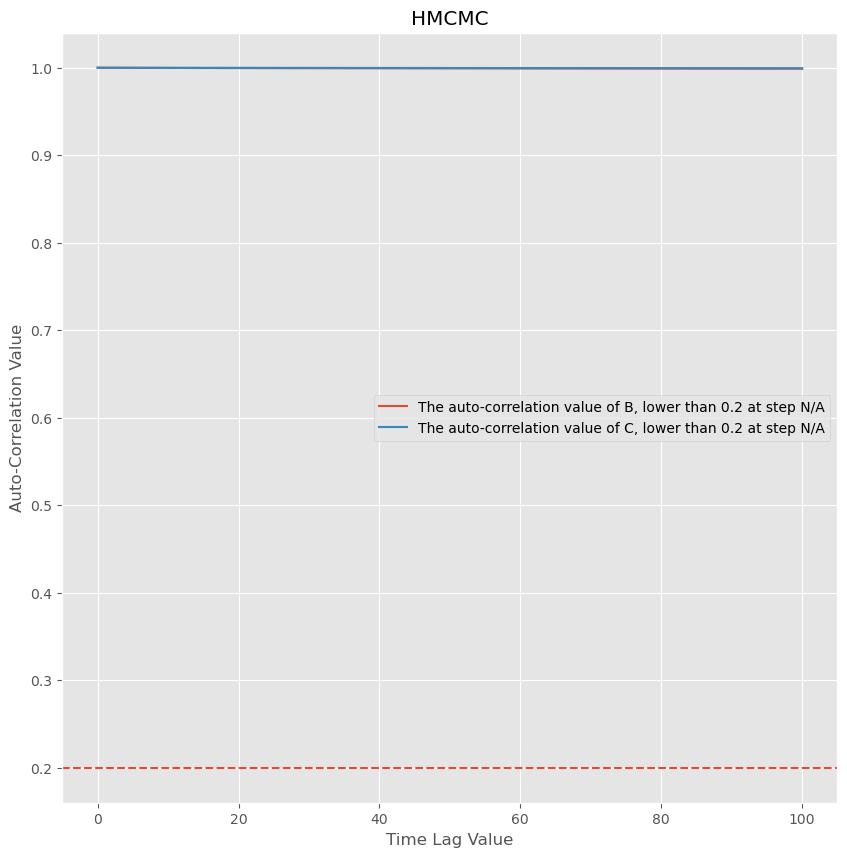

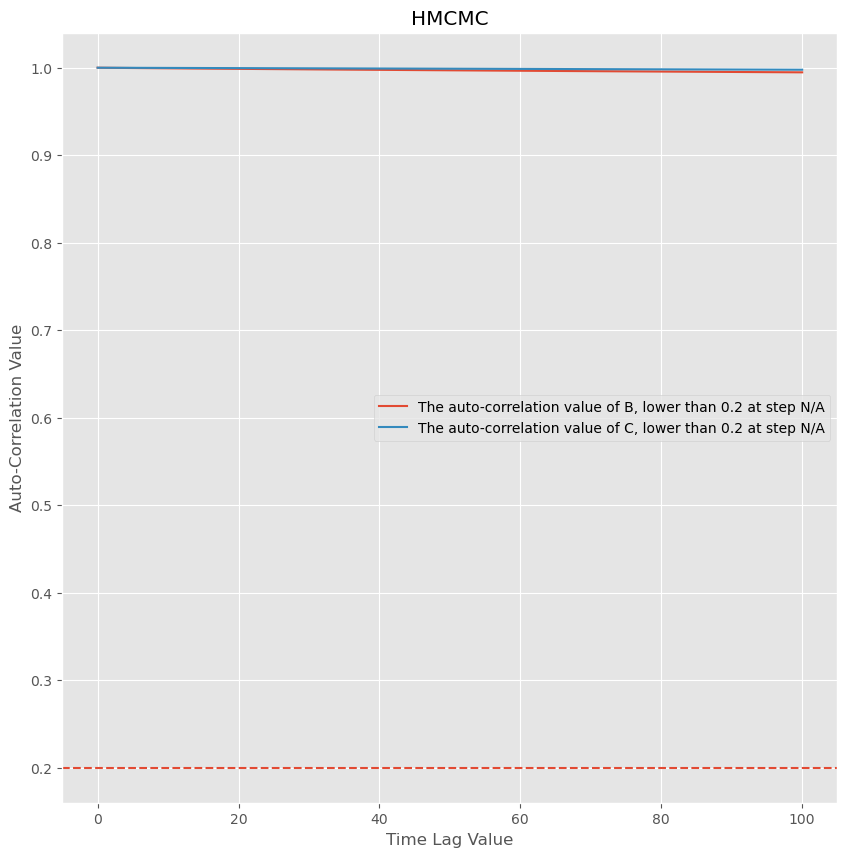

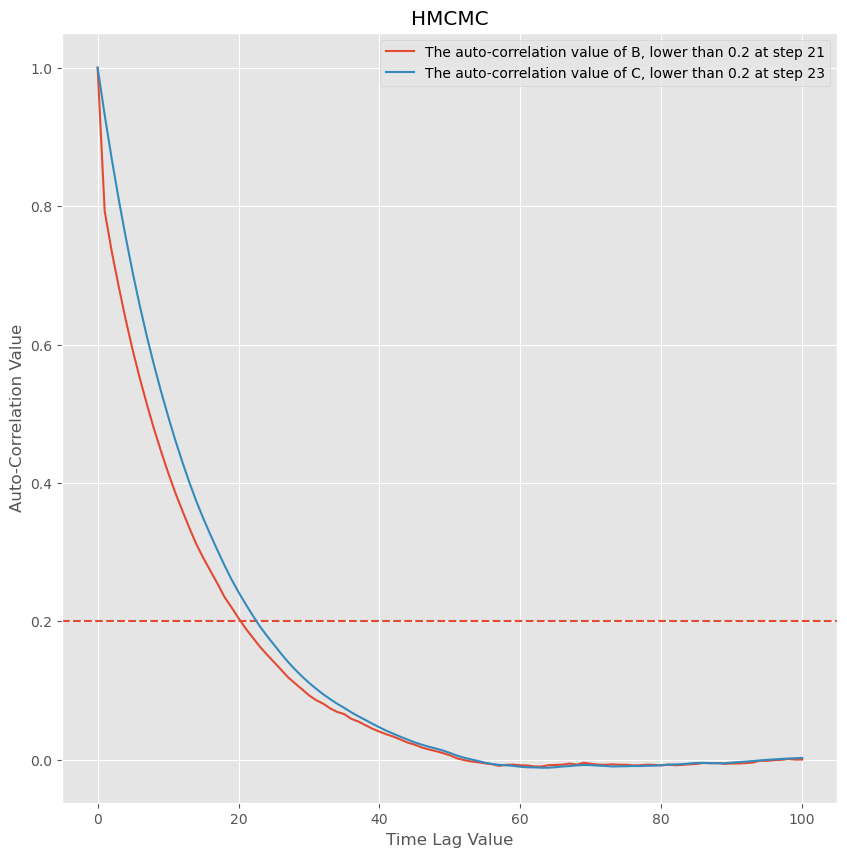

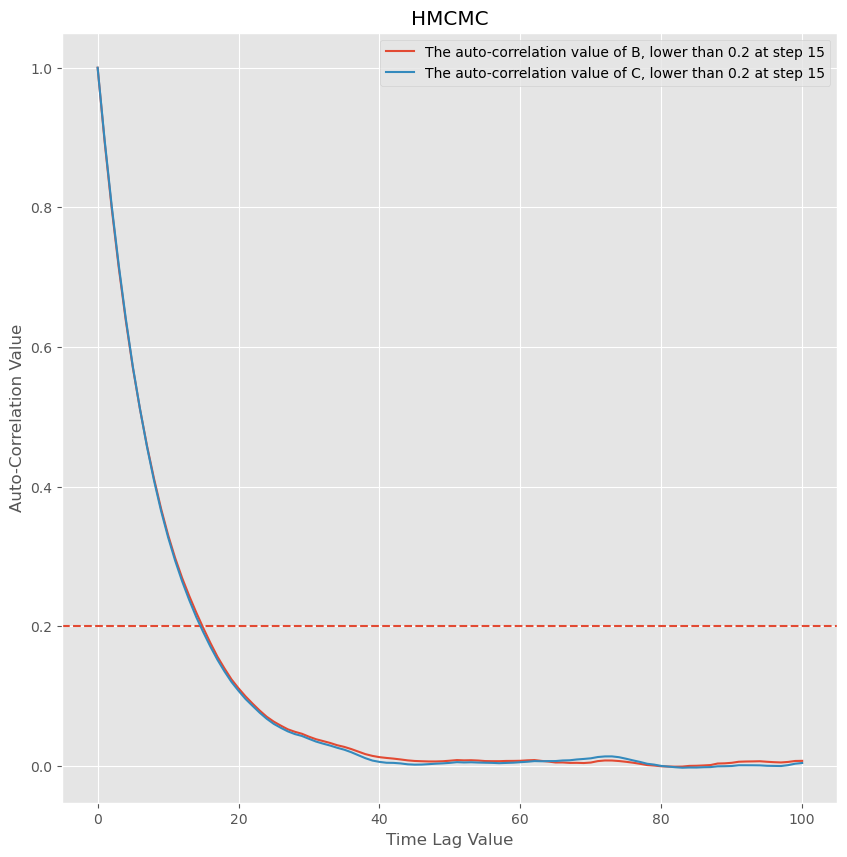

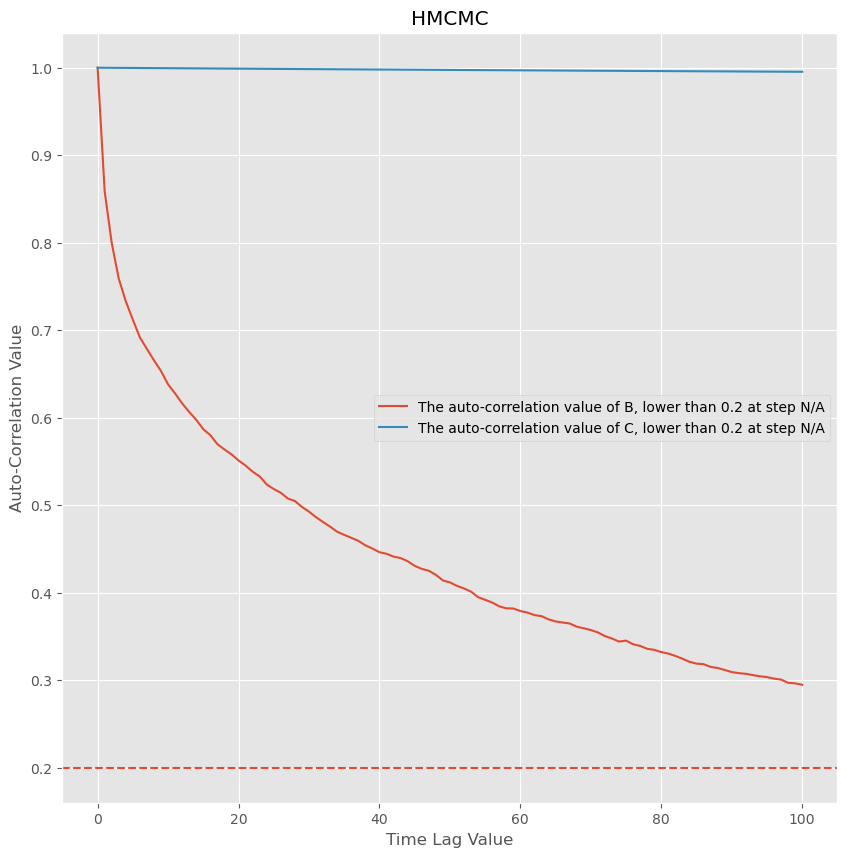

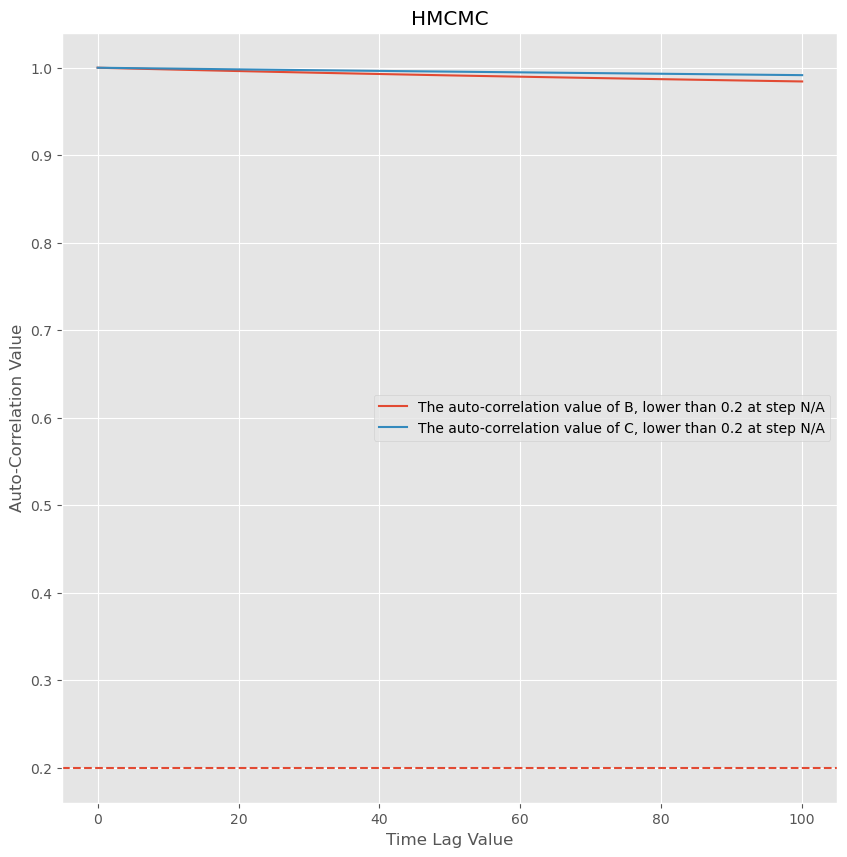

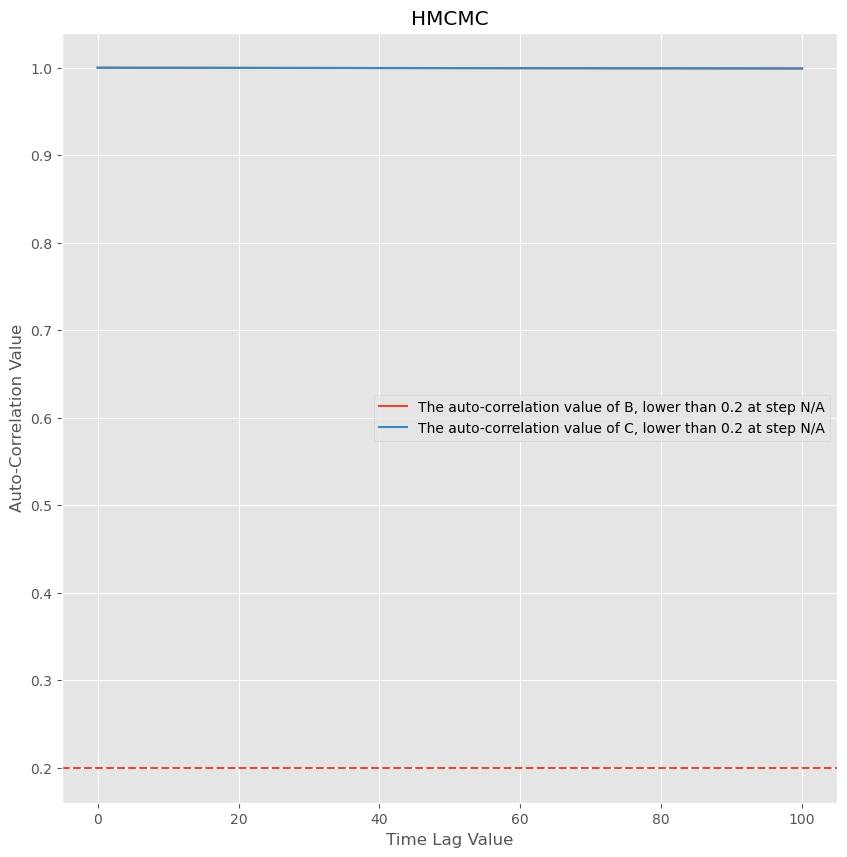

In [42]:
for Res_H_SF in Res_H:
    Vts.auto_corr_plot(Thetas=Res_H_SF["Thetas"], plot_nth_theta=[0,1], theta_index=["B", "C"], max_time_lag=100, data_range=[3000, steps], Threshold=0.2, set_title=f"HMCMC")

In [46]:
UpdatingPlot(Data_range=[0, 200], Data=Res_H_SF["Thetas"])

# Dfference Function

In [24]:
def density_ratioplot(Thetas, rho, bins, x_axis=0, y_axis=1, x_name="x", y_name="y", burn_in=0, alpha=1, label="", Save_fig=False, fig_name="density plot", Plot3D=False):
    """
    Plot an interactive 3D heatmap of a pair of dimensions from the input data.

    Arguments:
    Thetas (np.array): the value of parameters generated by the MCMC model
    bins (int): the number of bins of each histogram and heat map
    x_axis (int): the index of the x-axis to plot
    y_axis (int): the index of the y-axis to plot
    x_name (string): the name of the x-axis to plot
    y_name (string): the name of the y-axis to plot
    burn_in (int): the number of the data points want to "burn_in" for the graph
    credible_region (float): the size of the credible region in percent
    figsize (tuple): the size of the figure
    label (string): the label want to add to the plot
    Save_fig (bool): decide whether to save the output figure of the function
    fig_name (string): the saved figure name

    Returns:
    None
    """
    Thetas = np.asarray(Thetas)

    # prepare the data for the 2D histogram
    hist, xedges, yedges = np.histogram2d(Thetas[burn_in:, x_axis], Thetas[burn_in:, y_axis], bins=bins)
    xmid = 0.5*(xedges[1:] + xedges[:-1])
    ymid = 0.5*(yedges[1:] + yedges[:-1])
    X, Y = np.meshgrid(xmid, ymid)

    Likeli = np.asarray([rho(np.asarray([x,y])) for (x,y) in zip(X.flatten(), Y.flatten())])
    Likeli = Likeli.reshape(X.shape)
    Likeli = (Likeli)
    hist = (hist.T) / Thetas.shape[0]
    Z = Likeli
    # Calculate the Z axis value of the heat map
    Z -= hist

    if Plot3D:
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(111, projection='3d')
        # plot the density
        # plot the density plot of the inputted data
        ax.plot_surface(X, Y, Z, cmap='viridis', alpha=alpha)
        # # Add contour plots
        # cset = ax.contour(X, Y, hist.T, zdir='z', offset=np.min(hist), cmap=plt.cm.coolwarm)
        # cset = ax.contour(X, Y, hist.T, zdir='x', offset=np.min(xedges), cmap=plt.cm.coolwarm)
        # cset = ax.contour(X, Y, hist.T, zdir='y', offset=np.max(yedges), cmap=plt.cm.coolwarm)

        fig.colorbar(ax.plot_surface(X, Y, Z, cmap='viridis'))
        # create 3D heatmap with the data prepared above
        ax.set_title(f"3D ratio plot of true value and approximation of {x_name} and {y_name}"+label)

        ax.set_xlabel(x_name)
        ax.set_ylabel(y_name)
        ax.set_zlabel("ratio")
        ax.set_box_aspect([1, 1, 0.7])
        # ax.view_init(elev=-1.7, azim=-1.7)
        ax.dist = 10

        plt.tight_layout()
        if (Save_fig): 
            plt.savefig(fig_name+".png")
        plt.show()
    else:
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(111)
        # plot the density plot of the inputted data
        ax.imshow(Z, cmap='viridis', origin='lower', alpha=alpha, extent=[X.min(), X.max(), Y.min(), Y.max()], aspect='auto')

        fig.colorbar(ax.imshow(Z, cmap='viridis', origin='lower', alpha=alpha, extent=[X.min(), X.max(), Y.min(), Y.max()], aspect='auto'))
        # create 3D heatmap with the data prepared above
        ax.set_title(f"2D ratio plot of true value and approximation of {x_name} and {y_name}"+label)

        ax.set_xlabel(x_name)
        ax.set_ylabel(y_name)
        ax.dist = 10

        plt.tight_layout()
        if (Save_fig): 
            plt.savefig(fig_name+".png")
        plt.show()

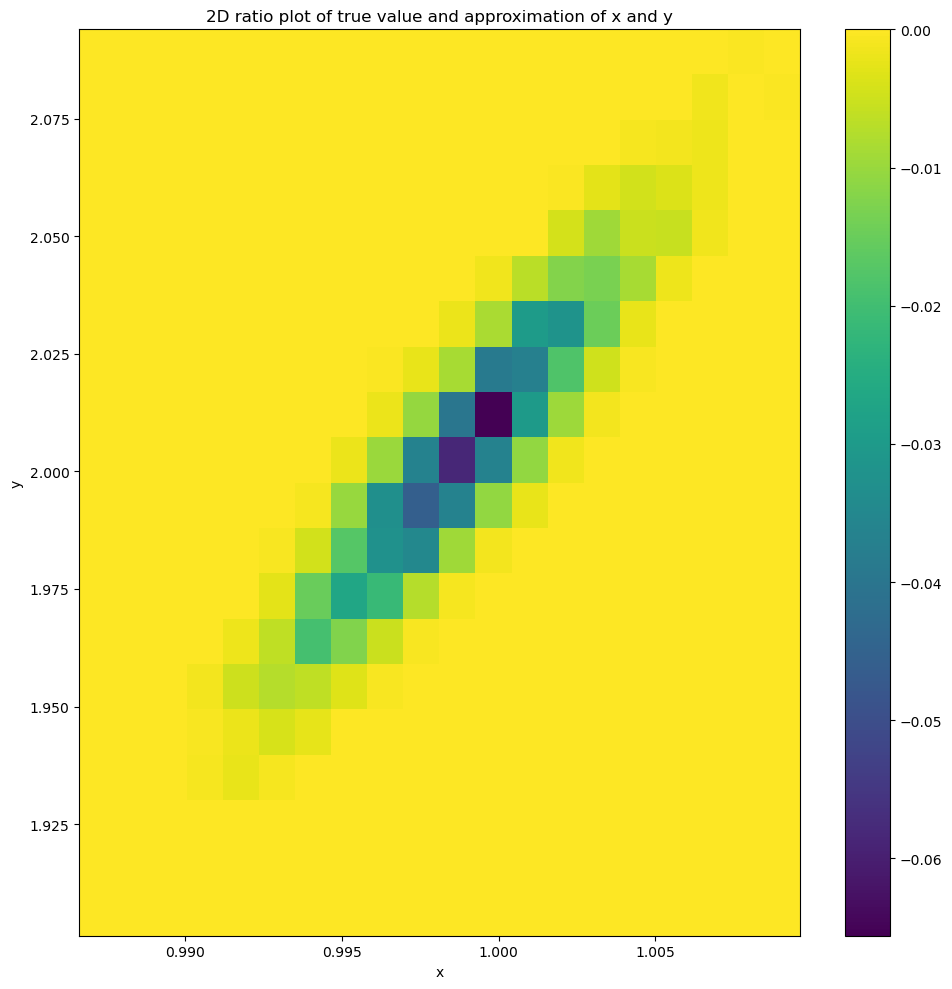

In [25]:
i = 2
density_ratioplot(
    Thetas=Res[i]["Thetas"][5000:],
    rho=SF_l.Posterior,
    bins=20
)